In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [5]:
data = pd.read_csv('ready_data.csv',index_col=0)

In [6]:
data

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km,parkings_1km
0,311480.0,131.63,0,1,2,30.082621,59.724677,42.18,39.32,36.65,...,34.54,38.56,40.41,43.51,42.04,46.67,0,0,0,47.0
1,254997.0,145.10,0,1,5,30.316138,59.911854,16.08,13.22,10.44,...,7.71,12.00,14.10,17.35,16.16,21.02,6,33,56,55.0
2,353742.0,73.50,0,1,7,30.301127,59.912368,17.50,14.62,11.85,...,9.38,13.67,15.75,19.00,17.79,22.65,1,27,55,55.0
3,190000.0,33.90,0,1,9,30.449978,59.956836,5.93,5.97,6.88,...,7.46,4.74,5.08,6.30,6.92,9.97,0,5,21,15.0
4,166667.0,89.40,0,1,5,30.325543,59.926372,14.80,11.94,9.16,...,6.64,11.05,13.21,16.49,15.37,20.24,8,34,57,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1,16,30.273171,59.963539,19.42,16.56,13.91,...,12.63,17.12,19.31,22.58,21.47,26.33,0,15,48,37.0
1063,418519.0,81.00,0,1,20,30.308223,59.904247,17.03,14.17,11.38,...,8.63,12.86,14.92,18.16,16.93,21.78,1,27,55,55.0
1064,91904.0,265.00,0,1,21,29.953560,60.091011,54.40,51.69,49.26,...,48.21,52.56,54.61,57.83,56.49,61.27,0,0,0,20.0
1065,84445.0,45.00,0,1,1,30.297156,59.956899,16.98,14.11,11.40,...,9.95,14.46,16.66,19.94,18.86,23.73,1,27,54,48.0


In [7]:
data.columns

Index(['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Devyatkino', 'Grazhdanskii prospekt',
       'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva',
       'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia',
       'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia',
       'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia',
       'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov',
       'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia',
       'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia',
       'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1',
       'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy',
       'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia',
       'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2',
       'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevik

In [11]:
data = data[['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','metro_1km','parkings_1km']]

In [14]:
data.describe()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,4.209756e+05,129.836510,0.076923,1.227017,8.960600,30.314739,59.934663,8.566876,1.025328,44.695122
std,2.138065e+06,95.730417,0.266594,0.897080,7.755558,0.101542,0.073656,8.340676,1.602907,21.438895
min,1.700000e+02,1.000000,0.000000,1.000000,1.000000,29.767554,59.707956,0.210000,0.000000,0.000000
25%,1.741100e+05,66.217500,0.000000,1.000000,3.000000,30.276738,59.898076,3.380000,0.000000,27.000000
50%,2.466440e+05,99.920000,0.000000,1.000000,6.000000,30.322282,59.936206,6.775000,0.000000,42.000000
75%,3.286675e+05,165.362500,0.000000,1.000000,13.000000,30.365453,59.985804,10.990000,1.000000,59.000000
max,4.300000e+07,530.000000,1.000000,15.000000,28.000000,30.642972,60.110679,62.240000,8.000000,120.000000


In [12]:
data.corr()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
price_per_square,1.000000,0.052151,-0.018915,-0.022547,0.010829,-0.035865,0.021632,-0.012567,0.013631,0.027482
squares,0.052151,1.000000,-0.015290,0.007834,-0.101729,-0.080110,0.075408,0.045229,-0.065051,0.042185
free,-0.018915,-0.015290,1.000000,0.009362,-0.021240,0.056520,-0.062732,0.063049,0.065750,0.006900
current_floor,-0.022547,0.007834,0.009362,1.000000,-0.018282,0.040392,0.023194,0.005875,-0.037305,0.042953
max_floor,0.010829,-0.101729,-0.021240,-0.018282,1.000000,0.017126,0.128434,0.089348,-0.232028,-0.006346
latitude,-0.035865,-0.080110,0.056520,0.040392,0.017126,1.000000,-0.044106,-0.470902,0.113773,-0.022237
longitude,0.021632,0.075408,-0.062732,0.023194,0.128434,-0.044106,1.000000,-0.185923,-0.050060,0.159282
Nevskii prospekt,-0.012567,0.045229,0.063049,0.005875,0.089348,-0.470902,-0.185923,1.000000,-0.387707,-0.340808
metro_1km,0.013631,-0.065051,0.065750,-0.037305,-0.232028,0.113773,-0.050060,-0.387707,1.000000,0.054681
parkings_1km,0.027482,0.042185,0.006900,0.042953,-0.006346,-0.022237,0.159282,-0.340808,0.054681,1.000000


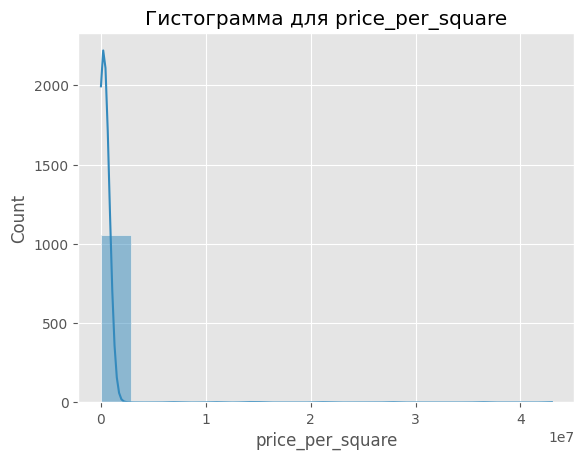

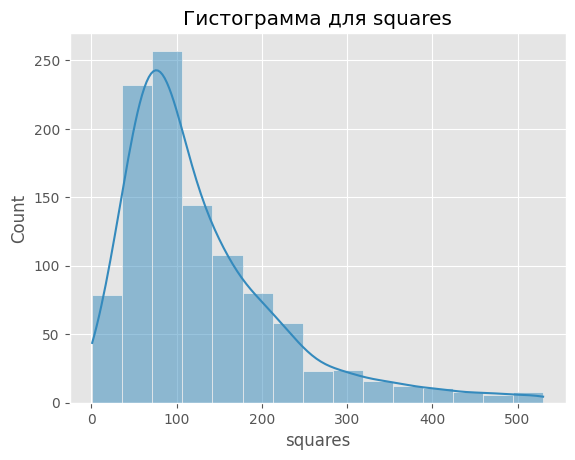

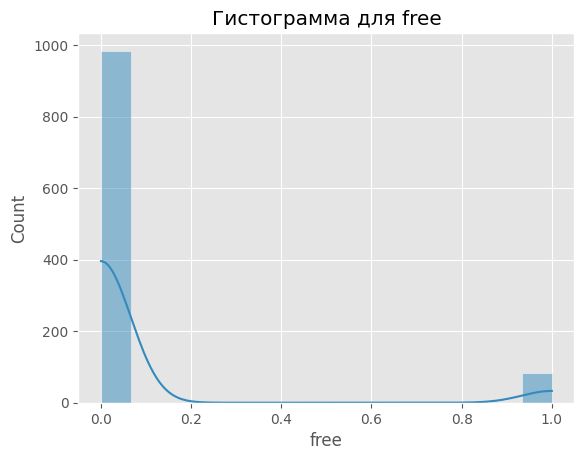

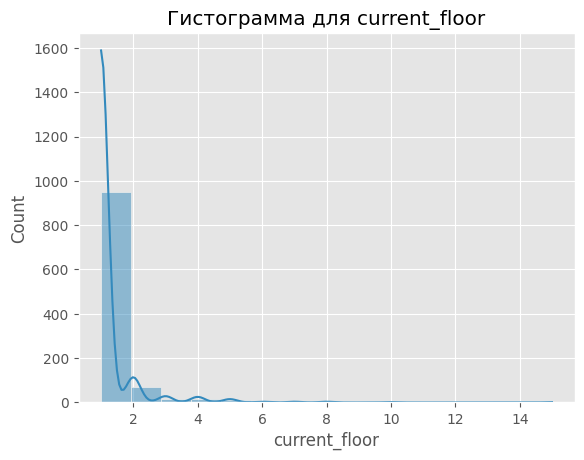

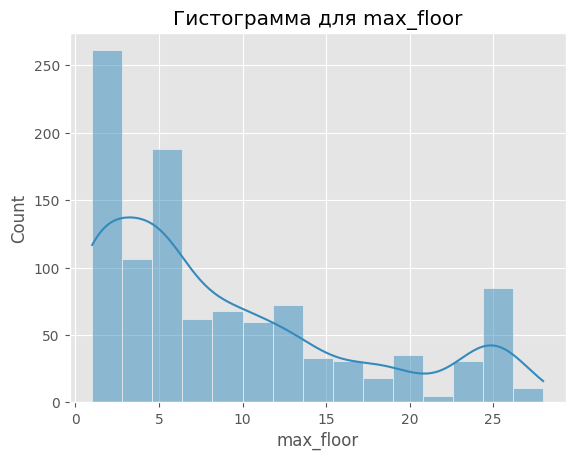

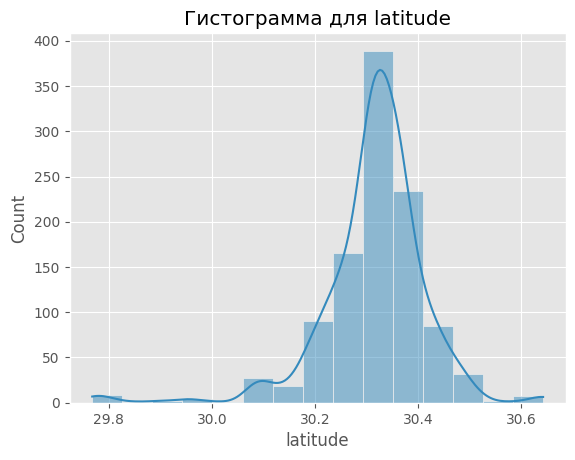

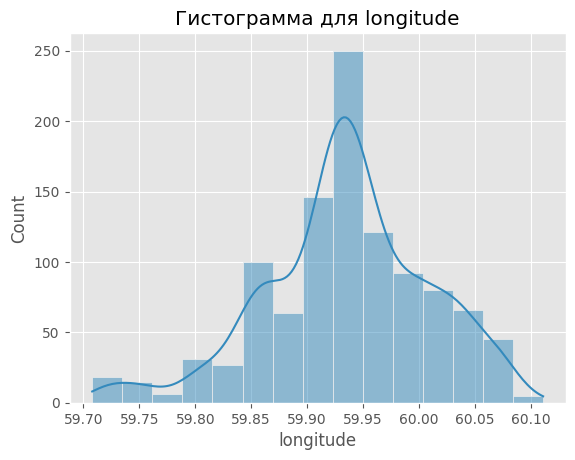

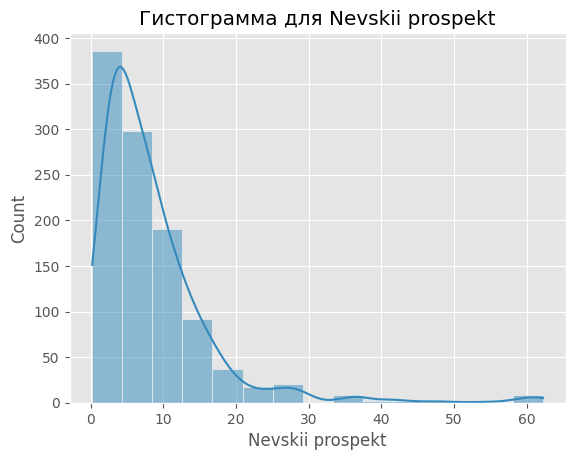

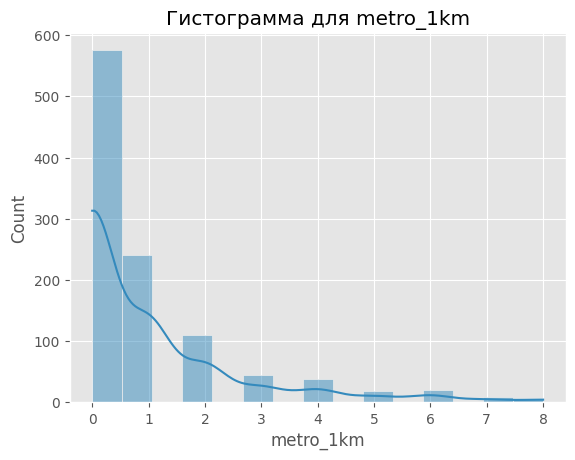

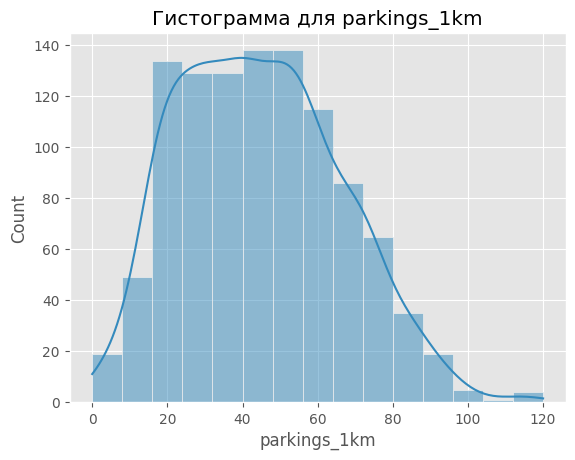

In [17]:
for column in data.columns:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Гистограмма для {column}")
    plt.show()

In [18]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=1.0, pvalue=0.0)
squares:PearsonRResult(statistic=0.05215101054256667, pvalue=0.08877917808076755)
free:PearsonRResult(statistic=-0.01891488214073124, pvalue=0.5373039719436481)
current_floor:PearsonRResult(statistic=-0.022547277175323687, pvalue=0.4621016314059841)
max_floor:PearsonRResult(statistic=0.010829327239156656, pvalue=0.7239614984267849)
latitude:PearsonRResult(statistic=-0.03586534959966691, pvalue=0.2420034358070319)
longitude:PearsonRResult(statistic=0.02163225543726102, pvalue=0.48047449667210995)
Nevskii prospekt:PearsonRResult(statistic=-0.012566601582102313, pvalue=0.6819306440652055)
metro_1km:PearsonRResult(statistic=0.013630755677672147, pvalue=0.6566536695936128)
parkings_1km:PearsonRResult(statistic=0.027482481334357316, pvalue=0.3700337660823213)


In [19]:
data.columns

Index(['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km'],
      dtype='object')

In [21]:
df_1 = data.copy()

# Определяем зависимые и не зависимые переменные
X = df_1[['squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km']]
y = df_1['price_per_square']

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модель
model_1 = LinearRegression()
model_1.fit(X_scaled, y)

# Получаем коэфф. / веса параметров
coefficients = model_1.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_1.intercept_
print(intercept)

[110835.00934736 -31107.92038916 -44385.92556367  45877.98995267
 -90059.60354725  14856.38228184 -46955.16894397  38300.24101299
  34002.46576725] 

420975.6397748615


In [24]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       price_per_square   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7439
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.669
Time:                        22:14:03   Log-Likelihood:                -17046.
No. Observations:                1066   AIC:                         3.411e+04
Df Residuals:                    1056   BIC:                         3.416e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.21e+05   6.56e+04      6.422      0.0

# IF WE MASHTABIRUEM

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
trans = MinMaxScaler()

In [30]:
data_trans = pd.DataFrame(trans.fit_transform(data))

In [32]:
data_trans.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.052151,-0.018915,-0.022547,0.010829,-0.035865,0.021632,-0.012567,0.013631,0.027482
1,0.052151,1.000000,-0.015290,0.007834,-0.101729,-0.080110,0.075408,0.045229,-0.065051,0.042185
2,-0.018915,-0.015290,1.000000,0.009362,-0.021240,0.056520,-0.062732,0.063049,0.065750,0.006900
3,-0.022547,0.007834,0.009362,1.000000,-0.018282,0.040392,0.023194,0.005875,-0.037305,0.042953
4,0.010829,-0.101729,-0.021240,-0.018282,1.000000,0.017126,0.128434,0.089348,-0.232028,-0.006346
5,-0.035865,-0.080110,0.056520,0.040392,0.017126,1.000000,-0.044106,-0.470902,0.113773,-0.022237
6,0.021632,0.075408,-0.062732,0.023194,0.128434,-0.044106,1.000000,-0.185923,-0.050060,0.159282
7,-0.012567,0.045229,0.063049,0.005875,0.089348,-0.470902,-0.185923,1.000000,-0.387707,-0.340808
8,0.013631,-0.065051,0.065750,-0.037305,-0.232028,0.113773,-0.050060,-0.387707,1.000000,0.054681
9,0.027482,0.042185,0.006900,0.042953,-0.006346,-0.022237,0.159282,-0.340808,0.054681,1.000000


In [35]:
for i in data_trans.columns:
    print(f"{i}:{pearsonr(data_trans[0], data_trans[i])}")

0:PearsonRResult(statistic=1.0, pvalue=0.0)
1:PearsonRResult(statistic=0.05215101054256667, pvalue=0.08877917808076755)
2:PearsonRResult(statistic=-0.018914882140731244, pvalue=0.5373039719436481)
3:PearsonRResult(statistic=-0.022547277175323684, pvalue=0.4621016314059841)
4:PearsonRResult(statistic=0.010829327239156649, pvalue=0.7239614984267849)
5:PearsonRResult(statistic=-0.03586534959966721, pvalue=0.24200343580704414)
6:PearsonRResult(statistic=0.021632255437262132, pvalue=0.4804744966721002)
7:PearsonRResult(statistic=-0.012566601582102311, pvalue=0.6819306440652055)
8:PearsonRResult(statistic=0.013630755677672147, pvalue=0.6566536695936128)
9:PearsonRResult(statistic=0.027482481334357316, pvalue=0.3700337660823213)


In [52]:
from sklearn.model_selection import train_test_split
X = data.drop('price_per_square', axis=1)  
y = data['price_per_square'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 999)

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

0.99812382739212

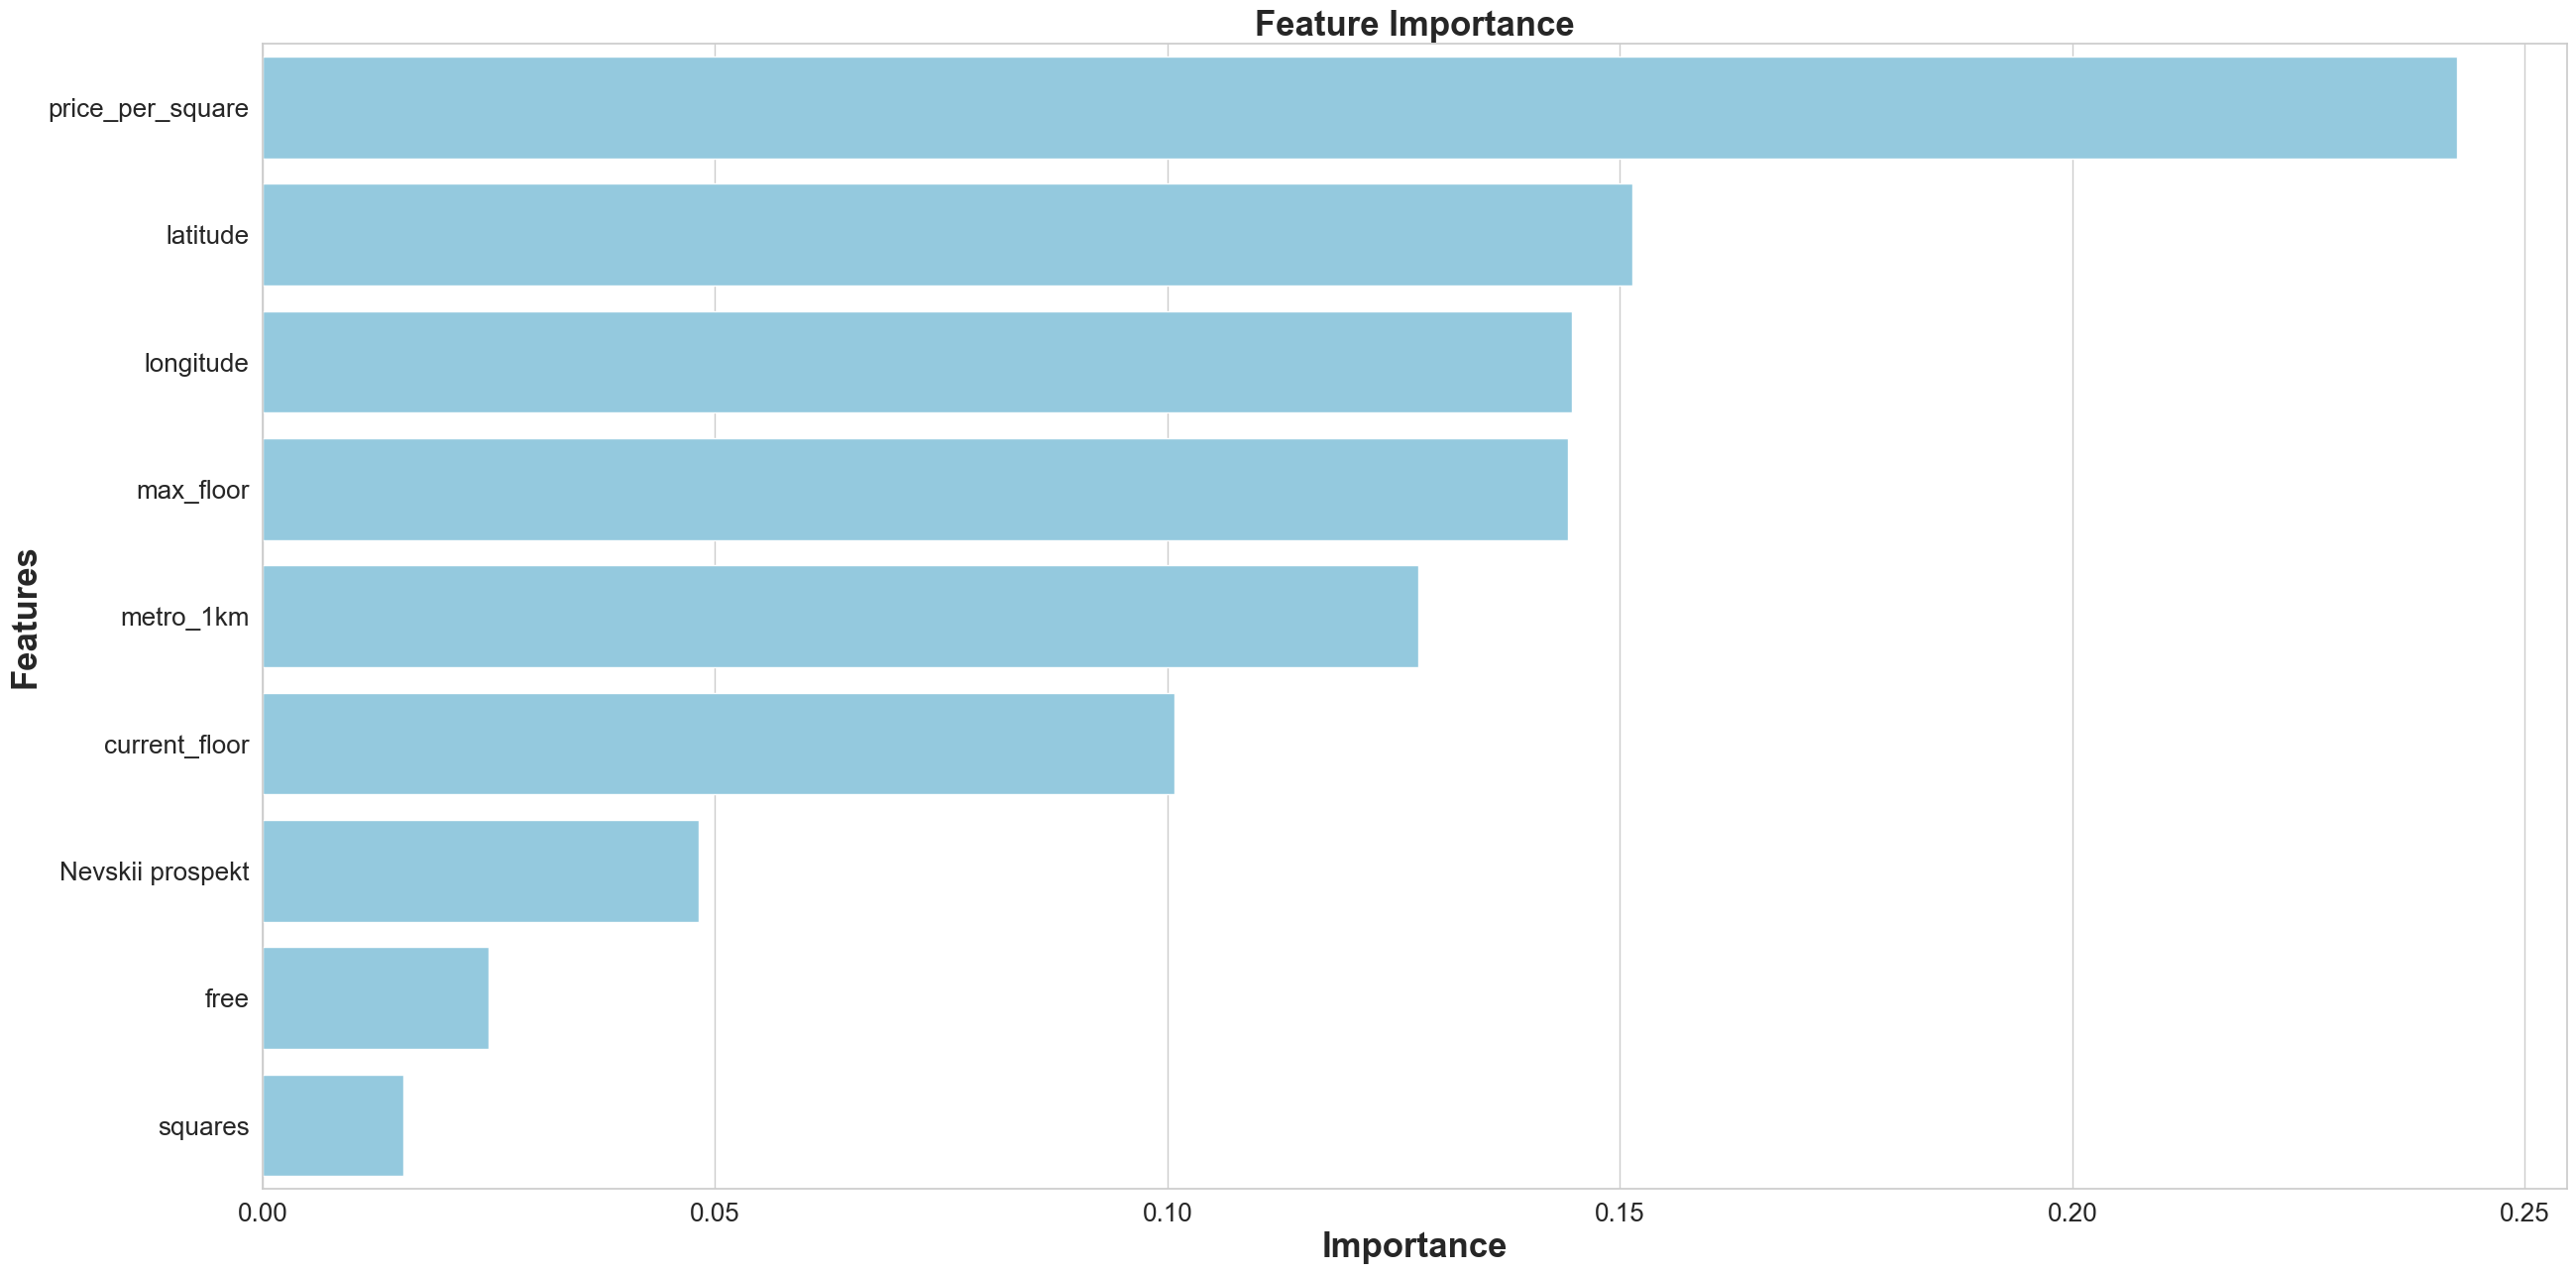

None

,Features,Gini-Importance
0,price_per_square,0.242527
1,latitude,0.151342
2,longitude,0.144723
3,max_floor,0.144216
4,metro_1km,0.127748
5,current_floor,0.100757
6,Nevskii prospekt,0.048170
7,free,0.024959
8,squares,0.015559


In [56]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [63]:
y_pred = rfc.predict(X_test_scaled)

In [70]:
y_pred = pd.Series(y_pred)

# Используем explode, чтобы развернуть список в Series
y_pred = y_pred.explode()

In [74]:
y_pred

0      260417.0
1      326578.0
2      280822.0
3      351000.0
4      350000.0
         ...   
528    200529.0
529    250000.0
530    123500.0
531    242000.0
532    297873.0
Length: 533, dtype: float64